In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding, BatchNormalization
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [3]:
tf.__version__

'2.1.0'

In [4]:
tf.keras.__version__

'2.2.4-tf'

In [5]:
pd.__version__

'0.25.1'

In [6]:
AMT = pd.read_csv('data/AMT_GRU.csv')
AMT.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
AMT.set_index('date', inplace = True, drop = True)
AMT['name'] = 'AMT'
AMT['mid'] = (AMT['high'] + AMT['low']/2)

In [7]:
ELS = pd.read_csv('data/ELS_GRU.csv')
ELS.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
ELS.set_index('date', inplace = True, drop = True)
ELS['name'] = 'ELS'
ELS['mid'] = (ELS['high']+ELS['low'])/2

In [8]:
PLD = pd.read_csv('data/PLD_GRU.csv')
PLD.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
PLD.set_index('date', inplace = True, drop = True)
PLD['name'] = 'PLD'
PLD['mid'] = (PLD['high'] + PLD['low'])/2

In [9]:
FR = pd.read_csv('data/FR_GRU.csv')
FR.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
FR.set_index('date', inplace = True, drop = True)
FR['name'] = 'FR'
FR['mid'] = (FR['high']+FR['low'])/2

In [10]:
MAA = pd.read_csv('data/MAA_GRU.csv')
MAA.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
MAA.set_index('date', inplace = True, drop = True)
MAA['name'] = 'MAA'
MAA['mid'] = (MAA['high']+MAA['low'])/2

In [11]:
SUI = pd.read_csv('data/SUI_GRU.csv')
SUI.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
SUI.set_index('date', inplace = True, drop = True)
SUI['name'] = 'SUI'
SUI['mid'] = (SUI['high'] + SUI['low'])/2

In [12]:
BXMT = pd.read_csv('data/BXMT_GRU.csv')
BXMT.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
BXMT.set_index('date', inplace = True, drop = True)
BXMT['name'] = 'BXMT'
BXMT['mid'] = (BXMT['high'] + BXMT['low'])/2

In [13]:
RHP = pd.read_csv('data/RHP_GRU.csv')
RHP.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
RHP.set_index('date', inplace = True, drop = True)
RHP['name'] = 'RHP'
RHP['mid'] = (RHP['high'] + RHP['low'])/2

In [14]:
df = pd.concat({'AMT':AMT, 'ELS':ELS, 'PLD':PLD, 'FR':FR, 'MAA':MAA, 'SUI':SUI,'BXMT':BXMT, 'RHP':RHP}, axis = 1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [16]:
df

AMT                                                ELS          \
              open    high      low   close   volume       mid   open    high   
2000-02-10   41.88   44.75   41.750   43.94  2589300   65.6250    NaN     NaN   
2000-02-11   44.50   45.00   44.060   44.25  1212700   67.0300  24.00  24.060   
2000-02-14   44.44   44.88   43.810   44.88  1778700   66.7850  24.00  24.250   
2000-02-15   45.00   47.25   45.000   45.63  1119500   69.7500  24.12  24.250   
2000-02-16   45.88   46.75   45.000   46.00   479400   69.2500  24.25  24.380   
...            ...     ...      ...     ...      ...       ...    ...     ...   
2020-01-27  236.32  238.16  235.675  237.47  1197185  355.9975  71.87  72.310   
2020-01-28  237.11  237.67  236.330  237.18  1051762  355.8350  71.80  72.620   
2020-01-29  237.43  237.86  232.860  233.44  1434417  354.2900  72.51  73.090   
2020-01-30  232.42  235.26  231.310  235.20  1271352  350.9150  72.57  73.905   
2020-01-31  234.36  234.94  230.850  231.74  1700943  350.3650  73.07  73.400   

                          ...    BXMT                               RHP  \
              low  close  ...     low   close    volume      mid   open   
2000-02-10    NaN    NaN  ...     NaN     NaN       NaN      NaN    NaN   
2000-02-11  24.00  24.00  ...   4.250   4.250       0.0   4.2500  29.19   
2000-02-14  24.00  24.19  ...   4.063   4.063    3000.0   4.0940  29.44   
2000-02-15  24.00  24.12  ...   4.063   4.063       0.0   4.1255  28.62   
2000-02-16  24.00  24.19  ...   4.060   4.060       0.0   4.0600  27.94   
...           ...    ...  ...     ...     ...       ...      ...    ...   
2020-01-27  71.21  71.80  ...  37.540  37.740  808441.0  37.6750  84.78   
2020-01-28  71.27  72.35  ...  37.780  38.090  671980.0  37.9650  86.24   
2020-01-29  72.02  72.71  ...  38.190  38.320  973953.0  38.3375  87.41   
2020-01-30  72.21  73.12  ...  38.140  38.420  651168.0  38.2875  86.37   
2020-01-31  72.39  72.75  ...  38.130  38.200  775083.0  38.3350  86.44   

                                                   
             high    low  close    volume     mid  
2000-02-10    NaN    NaN    NaN       NaN     NaN  
2000-02-11  29.81  29.19  29.44   15200.0  29.500  
2000-02-14  29.44  28.75  28.75    7100.0  29.095  
2000-02-15  28.62  27.62  28.44   29300.0  28.120  
2000-02-16  28.38  27.69  27.88   45700.0  28.035  
...           ...    ...    ...       ...     ...  
2020-01-27  86.14  84.24  86.00  403019.0  85.190  
2020-01-28  87.65  86.24  87.33  326757.0  86.945  
2020-01-29  87.77  86.27  87.02  201490.0  87.020  
2020-01-30  86.83  86.07  86.70  289728.0  86.450  
2020-01-31  86.65  84.24  85.03  362804.0  85.445  

[5025 rows x 48 columns]

In [15]:
df.drop('name', axis = 1, level = 1, inplace = True)

In [591]:
target_reit = 'AMT'
target_names = ['mid']

In [592]:
shift_days = 1

In [593]:
df_targets = df[target_reit][target_names].shift(-shift_days)

In [594]:
df_targets

,mid
date,
2000-02-10,67.030
2000-02-11,66.785
2000-02-14,69.750
2000-02-15,69.250
2000-02-16,68.005
...,...
2020-01-27,355.835
2020-01-28,354.290
2020-01-29,350.915


In [595]:
df[target_reit][target_names].head(shift_days + 5)

,mid
date,
2000-02-10,65.625
2000-02-11,67.030
2000-02-14,66.785
2000-02-15,69.750
2000-02-16,69.250
2000-02-17,68.005


In [596]:
df_targets.head(5)

,mid
date,
2000-02-10,67.030
2000-02-11,66.785
2000-02-14,69.750
2000-02-15,69.250
2000-02-16,68.005


In [597]:
# Concvert DF's into numpy arrays for input into neural network. 
x_data = df.values[0:-shift_days]
print(type(x_data))
print('Shape:', x_data.shape)

<class 'numpy.ndarray'>
Shape: (5024, 48)


In [598]:
#Output Signals(target-signals
y_data = df_targets.values[:-shift_days]

In [599]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (5024, 1)


In [600]:
# Number of observations in data
num_data = len(x_data)
num_data

5024

In [601]:
# Train - Test Split
# Percentage of observations to be used for training-set
train_split = 0.9

In [602]:
# Number observations in training set
num_train = int(train_split*num_data)
num_train

4521

In [603]:
# Number of observations in test set
num_test = num_data = num_train
num_test

4521

In [604]:
# Confirm train + test = total # of observations in dataset
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

5024

In [605]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

5024

In [606]:
# Number of input-signals
num_x_signals = x_data.shape[1]
num_x_signals

48

In [607]:
# Number of output signals
num_y_signals = y_data.shape[1]
num_y_signals

1

## Scaled Data (Prepares data as 2-D arrays)

In [608]:
# Instantiate MinMaxScaler
x_scaler = MinMaxScaler()

In [609]:
# Confirm data has been scaled between 0 and 1 (disregard rounding error present in max)
x_train_scaled = x_scaler.fit_transform(x_train)
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000002


In [610]:
# Scale test set the same
x_test_scaled = x_scaler.transform(x_test)

In [611]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [612]:
# Array shapes of input and output data
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(4521, 48)
(4521, 1)


## Random Batch Generator

In [613]:
def batch_generator(batch_size, sequence_length):
    while True:
        #New array for batch of input signals
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape = x_shape, dtype = np.float16)
        
        #New array for batch of output signals
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape = y_shape, dtype = np.float16)
        
        #Fill batch w/ random sequences
        for i in range(batch_size):
            #Random start index from location in training data
            idx = np.random.randint(num_train - sequence_length)
            
            #copy sequences of data starting at this index
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
            
        yield (x_batch, y_batch)

In [614]:
batch_size = 128
# 1 time-step = 1 day, so 5 * 4 = 20 business days per month (1 month time step)
sequence_length = 5 * 4
sequence_length

20

In [615]:
generator = batch_generator(batch_size, sequence_length)

In [616]:
# Test to see if generator works
x_batch, y_batch = next(generator)

In [617]:
print(x_batch.shape)
print(y_batch.shape)

(128, 20, 48)
(128, 20, 1)


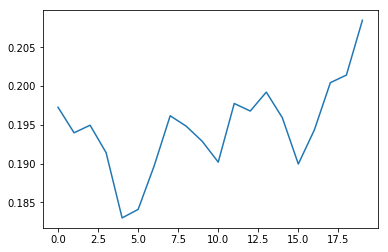

In [618]:
# Plot input signals as example
batch = 0
signal = 0
seq = x_batch[batch, :, signal]
plt.plot(seq)

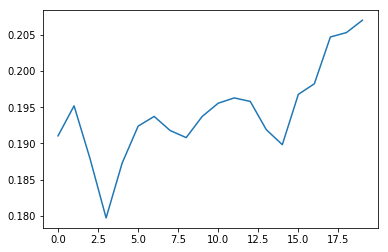

In [619]:
# Plot output signals that we want to learn how to predict given input signals
seq = y_batch[batch, :, signal]
plt.plot(seq)

## Validation Set

In [620]:
validation_data = (np.expand_dims(x_test_scaled, axis = 0),
                   np.expand_dims(y_test_scaled, axis = 0))

## Create Recurrent Neural Network

In [621]:
warmup_steps = 50
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(y_true=y_true_slice,
                                        y_pred=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [622]:
model = Sequential()

In [623]:
# Add GRU (Gated Recurrent Unit) to network
# Sigmoid function limits output values to the same range as the training data. We will use a linear activation function on the output instead so it can take arbitrary values
model.add(GRU(units = 128, 
              return_sequences = True, 
              input_shape = (None, num_x_signals,),
              dropout = 0.1))
model.add(BatchNormalization())
model.add(Dense(num_y_signals, activation = 'sigmoid'))

In [624]:
optimizer = 'RMSprop'
model.compile(loss = loss_mse_warmup, optimizer = optimizer)

In [625]:
gru_generator = batch_generator(batch_size = batch_size, 
                                sequence_length = 300)
model.fit_generator(generator = gru_generator,
                    epochs = 15,
                    verbose = 1,
                    steps_per_epoch = 25,
                    validation_data = validation_data,
                    use_multiprocessing = True)

  ...
    to  
  ['...']
Train for 25 steps, validate on 1 samples
Epoch 1/15
25/25 [==============================] - 78s 3s/step - loss: 0.0317 - val_loss: 0.2860
Epoch 2/15
25/25 [==============================] - 69s 3s/step - loss: 0.0103 - val_loss: 0.2032
Epoch 3/15
25/25 [==============================] - 71s 3s/step - loss: 0.0066 - val_loss: 0.3373
Epoch 4/15
25/25 [==============================] - 72s 3s/step - loss: 0.0056 - val_loss: 0.3524
Epoch 5/15
25/25 [==============================] - 70s 3s/step - loss: 0.0048 - val_loss: 0.3142
Epoch 6/15
25/25 [==============================] - 68s 3s/step - loss: 0.0048 - val_loss: 0.1506
Epoch 7/15
25/25 [==============================] - 73s 3s/step - loss: 0.0039 - val_loss: 0.1528
Epoch 8/15
25/25 [==============================] - 71s 3s/step - loss: 0.0033 - val_loss: 0.2031
Epoch 9/15
25/25 [==============================] - 67s 3s/step - loss: 0.0038 - val_loss: 0.1392
Epoch 10/15
25/25 [==============================] 

In [627]:
result = model.evaluate(x=np.expand_dims(x_test, axis=0),
                        y=np.expand_dims(y_test, axis=0))

1/1 [==============================] - 0s 394ms/sample - loss: 77788.5547


In [628]:
def plot_comparison(start_idx, length=500, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

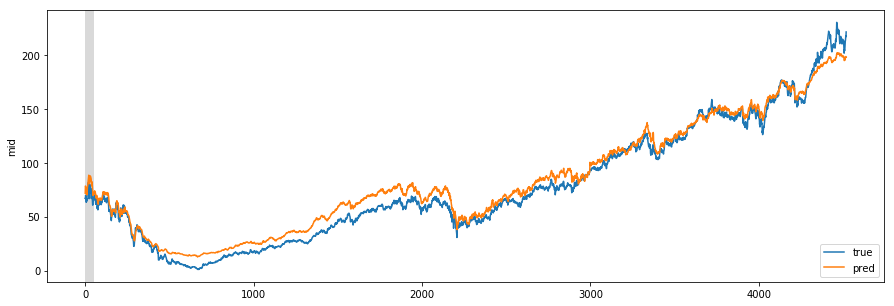

In [631]:
plot_comparison(start_idx=0, length=10000, train=True)